# **Unsupervised Learning----PCA and Clustering**
### **赵吕宇佳、赵伟皓**
### 2025-05-30
在本章中，我们在几个数据集上演示了**PCA和聚类**。

## **无监督学习**
- 无监督学习是从无标注的数据中学习数据的统计规律或者说内在结构的机器学习。
- 在无监督学习中，我们不再关注预测结果，因为没有相应的响应变量Y（即标签）。我们的目标是可视化输入实例。
- 或者是发现输入实例的子集间的内在规律。

本章主要介绍主成分分析（PCA），一种在应用监督技术之前用于数据可视化或数据预处理的方法；  
聚类（clustering），对原始数据进行分组的方法。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 加载 R 语言中的公开数据集
from statsmodels.datasets import get_rdataset
# 导入降维模块
from sklearn.decomposition import PCA
# 导入数据标准化工具
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文黑体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
import warnings
warnings.filterwarnings('ignore')

In [2]:
# K 均值聚类 和 层次聚类
from sklearn.cluster import \
     (KMeans, AgglomerativeClustering) 
# 画出聚类的树状图
from scipy.cluster.hierarchy import \
     (dendrogram, cut_tree)  
# 计算层次聚类链接矩阵的函数 compute_linkage
from ISLP.cluster import compute_linkage  

## **1. 主成分分析 Principal Components Analysis**
- 机器学习问题涉及的每个训练实例有成千上万甚至数百万个特征，所有这些特征不仅使训练变得极其缓慢，而且还会使得找到好的解决方案变得更加困难。这个问题通常称为**维度灾难**。

- **数据维度越高，过拟合的风险就越大**。
    - 如果在单位平面中随机挑两个点，这两个点之间的平均距离大约为0.52。如果在三维的单位立方体中随机挑两个点，两点之间的平均距离大约为0.66。
    - 但是如果在一个100万维的超立方体中随机挑两个点，平均距离高达408.25。
    - 这个事实说明高维数据集有很大可能是非常稀疏的：大多数训练实例可能彼此之间相距很远。所以这也意味着新的实例很可能远离任何一个训练实例，导致跟低维度相比，预测更加不可靠。**简言之，训练集的维度越高，过拟合的风险就越大**。

- 理论上来说，通过增大训练集，使训练实例达到足够的密度是可以解决维度灾难的。然而在实践中，要达到给定密度，所需要的训练实例数量随着维度的增加呈指数式上升。

### **Mathematical Implentation**

**主成分分析方法主要有两种**，可以通过**相关矩阵的特征值分解**或**样本矩阵的奇异值分解**进行。

**（1）相关矩阵的特征值分解算法。针对$m \times n$样本矩阵$X$，求样本相关矩阵**  $R = \frac { 1 } { n - 1 } X X ^ { T }$

再求样本相关矩阵的$k$个特征值和对应的单位特征向量，构造正交矩阵  $V = ( v _ { 1 } , v _ { 2 } , \cdots , v _ { k } )$

$V$的每一列对应一个主成分，得到$k \times n$样本主成分矩阵   
$$Y = V ^ { T } X$$


**（2）矩阵$X$的奇异值分解算法。针对$m \times n$样本矩阵$X$，求**   $X ^ { \prime } = \frac { 1 } { \sqrt { n - 1 } } X ^ { T }$

对矩阵$X ^ { \prime }$进行截断奇异值分解，保留$k$个奇异值、奇异向量，得到  $X ^ { \prime } = U S V ^ { T }$

$V$的每一列对应一个主成分，得到$k \times n$样本主成分矩阵$Y$  
$$Y = V ^ { T } X$$

#### **数据降维的优点**
1. 数据降维能够加速训练，但也会轻微降低系统性能。
2. 除了加快训练，降维对于数据可视化也非常有用。

#### **在这一节中，对R计算环境中的数据集USArrests执行PCA**。
- 使用get_rdataset（）检索数据，它可以从许多标准R包中获取数据。
- 数据集的行按字母顺序包含50个州。

In [3]:
USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [4]:
USArrests = USArrests.rename(columns={'Murder': '谋杀', 'Assault': '袭击','UrbanPop': '城市居住人口占比', 'Rape': '侵犯'})
USArrests.columns

Index(['谋杀', '袭击', '城市居住人口占比', '侵犯'], dtype='object')

#### **首先简要检查数据，可以发现这些变量的含义大不相同**。
- 数据框有几种计算列汇总的有用方法。
- 可以使用var()方法检查四个变量的方差。

In [5]:
USArrests.mean()

谋杀            7.788
袭击          170.760
城市居住人口占比     65.540
侵犯           21.232
dtype: float64

In [6]:
# 这些变量的方差也大不相同
USArrests.var()

谋杀            18.970465
袭击          6945.165714
城市居住人口占比     209.518776
侵犯            87.729159
dtype: float64

**城市居住人口占比**变量衡量的是每个州居住在城市地区的人口比例。

**PCA寻找解释数据集中大部分方差的衍生变量**。  
- 如果在执行PCA之前不缩放变量，那么主成分将主要由**袭击**变量驱动，因为它具有迄今为止最大的方差。
- **标准化是 PCA 的重要前置步骤**。因为 PCA 基于协方差矩阵，如果不标准化，变量的尺度（例如 "袭击" 数值大、"城市人口占比" 数值小）会影响分析结果。

In [7]:
# 将每列变量变为均值为0、标准差为1的标准正态分布
scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)
USArrests_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [8]:
# 创建一个 PCA 对象，默认保留所有主成分（不指定主成分数，默认提取全部）
pcaUS = PCA()

#### **对已经标准化的数据 USArrests_scaled 应用 PCA 算法**：
- 计算数据的协方差矩阵。
- 求其特征值与特征向量。
- 得到主成分方向（loading vectors）及解释的方差大小（explained variance）

In [9]:
pcaUS.fit(USArrests_scaled)

PCA()

拟合后，mean_属性对应于变量的均值。在这种情况下，由于使用了scaler()对数据进行居中和缩放，因此均值将全部为0。

In [10]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [11]:
# 查看每个主成分的方向（特征向量）
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

**第1主成分（PC1）方向**  
$$PC1 = 0.5359 × Murder + 0.5832 × Assault + 0.2782 × UrbanPop + 0.5434 × Rape$$
它大致是各个变量的加权平均，特别是 Murder、Assault 和 Rape 的加权组合，**代表“总体暴力程度”**。

**第2行 是 PC2 的方向**：  
$$PC2=−0.418×Murder−0.188×Assault+0.873×UrbanPop+0.167×Rape$$
**主要反映“城市化（UrbanPop）”方向，其他变量反向变化**。

In [12]:
# 为什么这些向量的“系数之和”不等于 1？
tutor = np.array([0.53589947,  0.58318363,  0.27819087,  0.54343209])
np.sum(tutor)          # 和约为 1.94，不是1

1.9407060600000001

In [13]:
np.linalg.norm(tutor)  # L2范数约为 1.0（符合单位向量）

0.9999999924196914

| 问题             | 回答                                              |
| -------------- | ----------------------------------------------- |
| 主成分的系数和为什么不为1？ | 因为它们是单位向量，满足 $\sum v_i^2 = 1$，不是 $\sum v_i = 1$ |
| 是不是有问题？        | 完全正常，PCA 的特征向量是“方向”，其 L2 范数为 1 是规范要求            |
| 可以转换成和为1吗？     | 可以手动 L1 归一化，但这样失去 PCA 的原始意义           |


在拟合后，可以使用pcaUS的transform()方法计算分数。

In [14]:
scores = pcaUS.transform(USArrests_scaled)
scores

array([[ 9.85565885e-01, -1.13339238e+00, -4.44268788e-01,
        -1.56267145e-01],
       [ 1.95013775e+00, -1.07321326e+00,  2.04000333e+00,
         4.38583440e-01],
       [ 1.76316354e+00,  7.45956781e-01,  5.47808243e-02,
         8.34652924e-01],
       [-1.41420290e-01, -1.11979678e+00,  1.14573692e-01,
         1.82810896e-01],
       [ 2.52398013e+00,  1.54293399e+00,  5.98556799e-01,
         3.41996478e-01],
       [ 1.51456286e+00,  9.87555085e-01,  1.09500699e+00,
        -1.46488703e-03],
       [-1.35864746e+00,  1.08892789e+00, -6.43257569e-01,
         1.18469414e-01],
       [ 4.77093091e-02,  3.25358925e-01, -7.18632942e-01,
         8.81977637e-01],
       [ 3.01304227e+00, -3.92285133e-02, -5.76829492e-01,
         9.62847520e-02],
       [ 1.63928304e+00, -1.27894240e+00, -3.42460080e-01,
        -1.07679681e+00],
       [-9.12657146e-01,  1.57046001e+00,  5.07818939e-02,
        -9.02806864e-01],
       [-1.63979985e+00, -2.10972917e-01,  2.59801342e-01,
      

### **得分描述了样本在“主要变化方向”上的表达**。
#### **原始样本投影到主成分方向上，得到的是 每个样本在主成分方向上的坐标**。  
**PC1 和 PC2 是从原始变量中提取的两个新的坐标轴。每个州在这个新坐标系中的位置反映了它的整体特征**。
- 靠近右上角的州：在 PC1、PC2 得分都高 → 说明这些州在谋杀、侵犯等方面的值较高；
- 靠近左下角的州：得分低 → 上述变量的值较低。

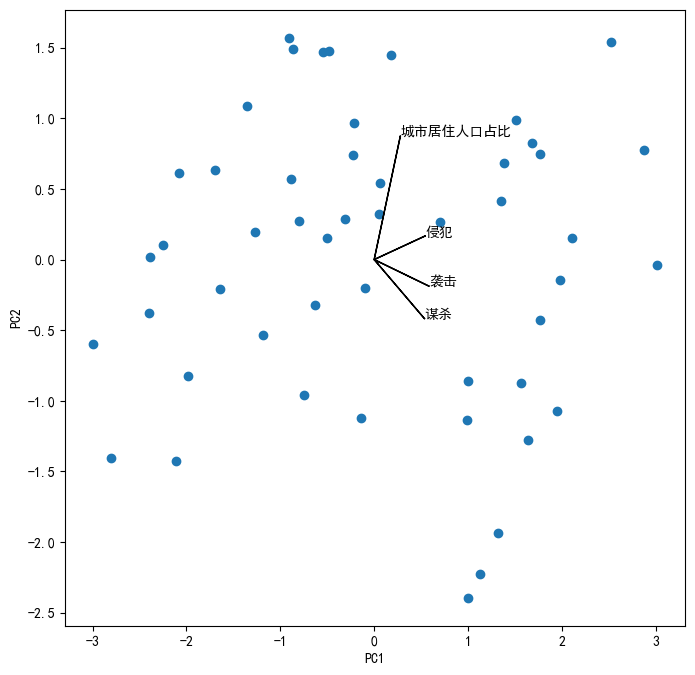

In [15]:
i, j = 0, 1 # 指定绘制第1和第2主成分
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# 绘制了所有样本在 PC1-PC2 平面上的分布图
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    # 表示第 1、2 个主成分在第 k 个变量方向上的分量
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k], pcaUS.components_[j,k], USArrests.columns[k])

**1. 变量之间的相关性（看夹角）**：
- 谋杀、袭击、侵犯 的箭头几乎是同方向（夹角小），说明它们之间高度正相关；  
- 城市居住人口占比（UrbanPop） 和其它三个箭头的夹角偏大（接近 90°），说明它与其它变量相关性不强。  


**2. 变量在主成分上的贡献**：
- 箭头长度 代表该变量在 PC1-PC2 平面上的投影强度，越长表示越能区分样本。  
- 谋杀、袭击、侵犯 这三个线在横轴上都较长，说明它们在 PC1 的解释力较强；  
- 城市居住人口占比 在纵轴上较长，说明这个变量在 PC2 的解释力较强。

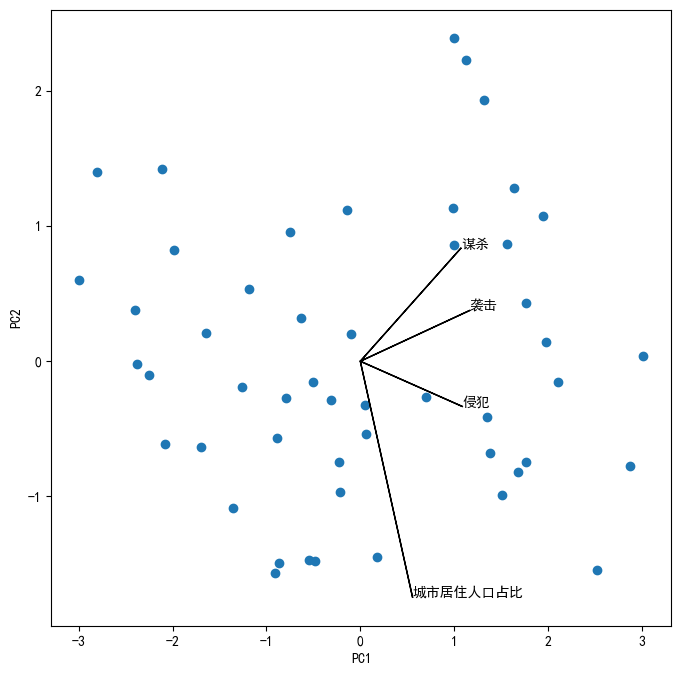

In [16]:
# 翻转方向不改变主成分的数学意义
scale_arrow = s_ = 2
scores[:,1] *= -1
# 翻转y轴
pcaUS.components_[1] *= -1 
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
# 让图看起来更符合人类直觉，比如：变量箭头朝向数据聚集区；PC1 高值表示“高犯罪”，而不是反着
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
    ax.text(s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k], USArrests.columns[k])

#### **每个主成分的特征值，表示每个主成分解释了多少方差。**
- 数值越大，说明该主成分越重要。
- 总和就是数据的总方差（标准化后的数据总方差等于原变量个数，即4）

In [17]:
# 查看每个主成分的解释方差（特征值）
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [18]:
# 查看每个主成分解释的方差比例
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

**实际使用中，我们常常只保留前2个主成分来实现降维（例如二维可视化），因为它们合起来已经解释了 87% 的信息**。
- 第一个主成分解释了数据中62.0%的方差，下一个主成分则解释了24.7%的方差，以此类推。
- 因此可以绘制每个组件解释的**PVE**，以及累积的**PVE**。 **PVE: Proportion of Variance Explained**

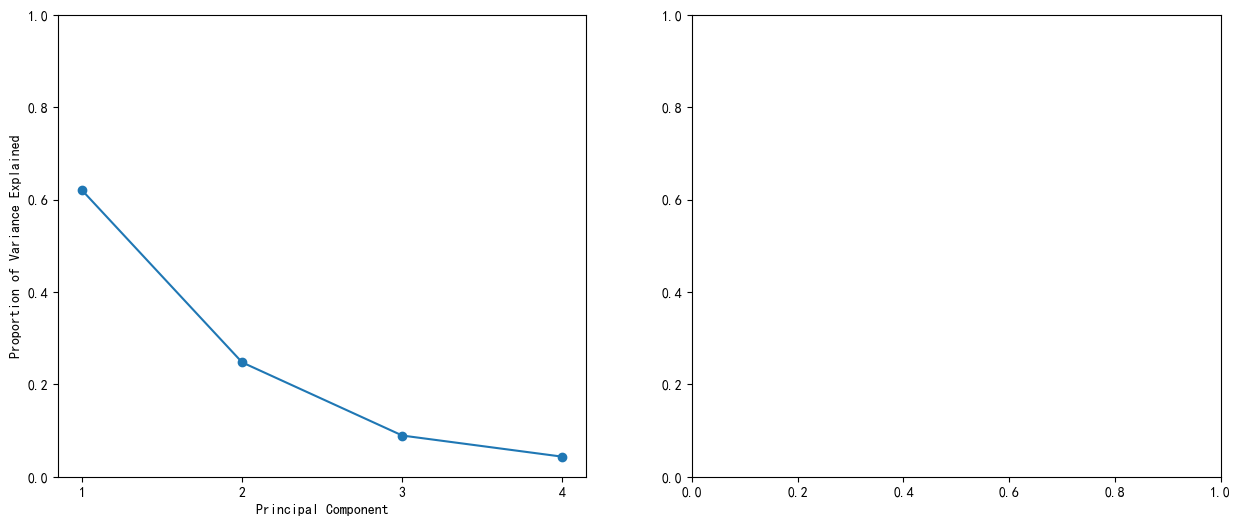

In [19]:
# 首先绘制所解释的方差比例。 
#%%capture
fig, axes = plt.subplots(1, 2, figsize = (15, 6))
# 创建横坐标刻度标签（主成分编号）
ticks = np.arange(pcaUS.n_components_) + 1
ax = axes[0]
ax.plot(ticks, pcaUS.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

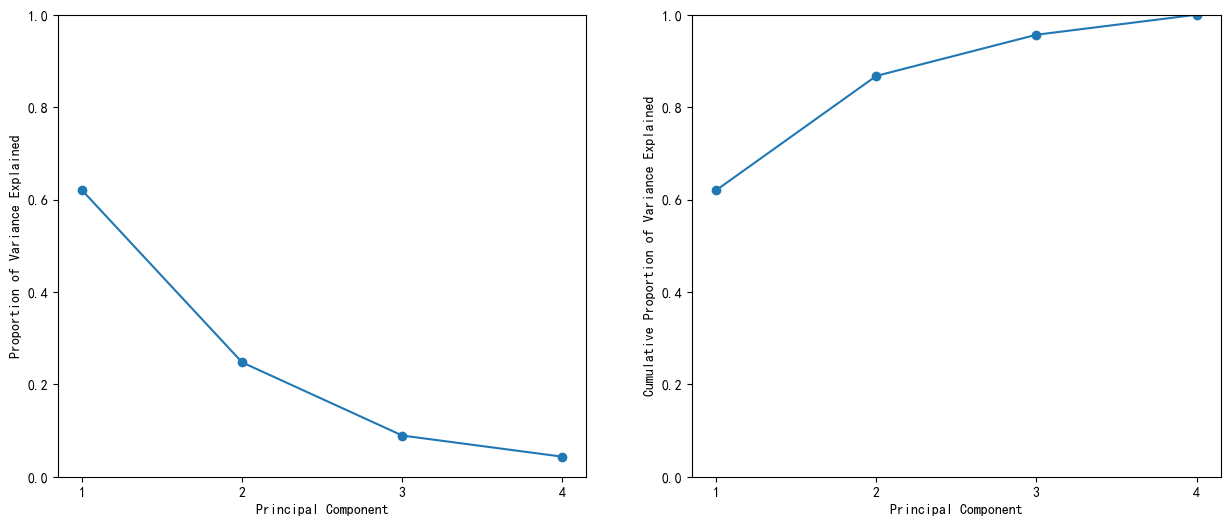

In [20]:
# 累积解释方差比例图
ax = axes[1]
# 累计求和，表示前n个主成分累计解释的方差比例。
ax.plot(ticks, pcaUS.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

#### **总结**
- **左图**：前两个主成分合计解释约 87% 的总变异；后两个主成分的贡献可以忽略不计（PC3 和 PC4 的解释量较少（分别约 9% 和 4%））
- **右图**：纵轴是累计解释比例，即 PC1+PC2+...+PCk 的总解释比例
    - 从图中可以看出：PC1 → 62%；PC1+PC2 → 87%； PC1+PC2+PC3 → 97%；全部主成分解释 100%

**我们的数据有四个变量：谋杀、袭击、强奸 和 城市居民占比。**  
**根据这图可以判断**：  
- 第一主成分（PC1）是最重要的，它代表整体的“暴力水平”或“治安风险”维度
- 第二主成分（PC2）与城市化率相关
- 后两个主成分贡献极小，可视为噪声或细节差异。

In [21]:
# cumsum()方法计算数值向量元素的累积和。例如：
a = np.array([1,2,8,-3])
np.cumsum(a)

array([ 1,  3, 11,  8])

## **2. 矩阵完成 Matrix Completion**
- 现在重新创建对USArrests数据进行的分析。  
- 我们使用按比例和中心排列的USArrests数据，如下所示。奇异值分解（SVD）是降维PCA的另一通用算法。

| 名称 | 含义                   | SVD结果 | PCA等价物                   |
| -- | -------------------- | ----- | ------------------------ |
| U  | 样本在主成分方向的单位坐标        | `U`   | `scores / D`             |
| D  | 奇异值（标准差 × sqrt(n-1)） | `D`   | $\sqrt{\lambda_i (n-1)}$ |
| V  | 主成分方向（变量组合）          | `V`   | `pca.components_`        |


In [22]:
X = USArrests_scaled
U, D, V = np.linalg.svd(X, full_matrices=False)
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

**对 X 做奇异值分解（Singular Value Decomposition）**：
- U 是左奇异向量矩阵（形状为 50×4）对应样本方向；  
- D 是奇异值向量（长度为 4）表示主成分的标准差；  
- V 是右奇异向量矩阵（形状为 4×4）对应变量方向，即主成分方向

**矩阵V相当于从主分量加载矩阵（符号可能不同，因为奇异值分解允许符号翻转）**。  

**full_matrices=True（默认值）**
- 优点：数学上完整，矩阵可以完全重建；
- 缺点：对于 高维数据（尤其是列远少于行时），会导致大量冗余计算和存储

In [23]:
V

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [24]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

- **对应矩阵U于PCA得分矩阵的标准化版本（每列标准化为平方和为1）**。
- 如果将U的每一列乘以D的相应元素，可以精确地恢复PCA得分（SVD允许符号翻转）。


U * D[None, :] 是广播机制：每一列的 U[:, i] 乘以对应 D[i]

这相当于：$𝑈⋅diag(𝐷)=𝑋⋅𝑉$   
正好是 PCA 的 主成分得分（scores）。

In [25]:
# 还原出 PCA 得分（scores）。
(U * D[None,:])[:3]

array([[-0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [-1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [-1.76316354, -0.74595678,  0.05478082, -0.83465292]])

In [26]:
scores[:3]

array([[ 0.98556588,  1.13339238, -0.44426879, -0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333,  0.43858344],
       [ 1.76316354, -0.74595678,  0.05478082,  0.83465292]])

**PCA 得分的计算**  

PCA的变换过程是：
$\text{scores} = X \cdot V^T$

其中：

- $X$ 是标准化后的原始数据（通常指均值为0，标准差为1）
- $V^T$ 是主成分方向矩阵（即 `PCA.components_.T`）

---

**SVD 的变换**

SVD 分解形式为：$X = U \cdot \mathrm{diag}(D) \cdot V^T$

两边右乘 \( V \) 得：$X \cdot V = U \cdot \mathrm{diag}(D)$

因此有：$\text{scores} = X \cdot V = U \cdot \mathrm{diag}(D)$

也就是说，PCA 得分矩阵其实就是 SVD 中的左奇异向量 $U$ 乘以奇异值对角阵 $\mathrm{diag}(D)$。

---

### **低秩矩阵完成（Low-rank Matrix Completion）的一个具体实例**
特别是基于奇异值分解（SVD）的缺失值迭代填充。

**在原始标准化数据矩阵 X 中随机插入缺失值（NaN），为后续进行 矩阵完成（Matrix Completion）做准备。**
- 现在随机省略50*4数据矩阵中的20个条目。
    - 首先随机选择20行（状态），然后随机选择每行中的四个条目中的一个。
    - 这确保了每一行至少有三个观测值。

In [27]:
n_omit = 20
np.random.seed(15)
# 不放回抽样，确保每个缺失值来自不同的行。
r_idx = np.random.choice(np.arange(X.shape[0]), n_omit, replace=False) 
r_idx

array([35, 37, 41, 26, 38, 43,  3, 33, 30, 36, 14, 16, 20,  9, 44, 47, 49,
       22, 25, 42])

In [28]:
# 随机从 X 的列索引中选出 20 个可以重复的列。
c_idx = np.random.choice(np.arange(X.shape[1]), n_omit, replace=True)
c_idx

array([3, 3, 0, 1, 0, 1, 3, 1, 0, 0, 3, 1, 1, 0, 0, 2, 2, 0, 1, 2])

In [29]:
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan
Xna

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238,         nan],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [        nan,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 ,         nan],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101,    

**通过用非缺失条目的列均值替换缺失值**。  
- 对每一列（变量）计算非缺失的均值。
- 把缺失位置替换为对应列的均值，作为初始猜测

In [30]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0)
Xhat[r_idx, c_idx] = Xbar[c_idx]
Xhat

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238,  0.04508076],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [-0.00368923,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 ,  0.04508076],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101,  0.

In [31]:
# 返回矩阵 X 的秩为 M 的近似矩阵
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M]
    return L.dot(V[:M])

**low_rank函数**：它返回一个矩阵 X^，这是原始矩阵 X 的秩为 M 的近似版本 —— 它只保留了前 M 个主成分（奇异值/方向），用于重建一个保留最多结构信息的简化矩阵。  
1. 基于当前填补矩阵 Xhat 构造其秩为1的近似 Xapp。    
2. 用 Xapp 的值替换掉Xna中缺失值位置的内容，更新 Xhat。  
3. 计算非缺失部分的均方误差 mss，更新相对误差 rel_err。  

In [32]:
# 设置误差计算指标：
thresh = 1e-7                        # t相对误差阈值（用于停止迭代）。
rel_err = 1                          # 初始设为1，使得可以进入 while 循环。
count = 0                           
ismiss = np.isnan(Xna)               # 记录缺失值的位置（布尔矩阵）。
mssold = np.mean(Xhat[~ismiss]**2)   # 初始的均方误差
mss0 = np.mean(Xna[~ismiss]**2)      # 真实数据的参考均方值（标准化前）

In [33]:
while rel_err > thresh:
    count += 1
    # Step 1
    Xapp = low_rank(Xhat, M=1) 
    # Step 2
    Xhat[ismiss] = Xapp[ismiss]
    # Step 3
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}"
          .format(count, mss, rel_err))

Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


观察如上可以发现，**经过八次迭代，相对误差已经降至阈值=1e-7以下，因此算法终止**。  
当这种情况发生时，非缺失元素的均方误差等于0.381。

In [34]:
# 20个估算值和实际值之间的相关性
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]

0.711356743429736

#### **总结**
**用 SVD 和低秩约束迭代地恢复了一个带有缺失值的矩阵。具体来说**：
- 假设矩阵是低秩的（只用最主要的奇异值做逼近）。

- 每次用当前近似值来更新缺失项。

- 整个算法是一种典型的交替最小化（Alternating Minimization）思想。

- 用算法推测的 20 个缺失值 与其真实值之间的 线性相关性为 0.71。
    - 0.71 属于中等偏强的正相关，说明矩阵完成的效果相当不错。
    - 它说明**用低秩近似和迭代方法成功地捕捉到了真实数据的主要结构和趋势**，即使根本不知道这些缺失值的真实值。

## **3. 聚类 Clustering**

聚类是指一组非常广泛的技术，用于在数据集中查找子组或聚类集群。当我们对一个数据集的观察结果进行聚类时，我们试图将它们划分为不同的组，以便每组内的观察结果彼此非常相似，而不同组内的观察结果彼此非常不同。

由于聚类在许多领域都很流行，因此存在着大量的聚类方法。在本节中，我们关注两种最著名的聚类方法: **K均值聚类 和 层次聚类**。

### **3.1. $K$-Means 聚类**

$K$-Means 聚类是一种简单而优雅的方法，用于将数据集划分为不同的、不重叠的 $K$ 个区域。  
**请找出 $K$ 个点，作为中心，使得每个样本被分配到最近的一个中心，从而最小化所有点到其簇中心的平方距离之和。**
   
**一个简单的模拟例子**：在这个例子中，数据中确实有两个集群：  
- 前25个观测值相对于下一个25个观测点有一个均值偏移。
- 后 25 个点保持原来的标准正态分布

In [35]:
np.random.seed(0);
X = np.random.standard_normal((50,2));
# 前 25 个点偏向右下角（x 加3，y 减4）
X[:25,0] += 3;
# 对前 25 个样本的第二个特征（y 坐标）减去 4 
X[:25,1] -= 4;

**$K-Means$ 的优化过程容易陷入局部最优**。  
由于它的初始中心是 随机选择的，不同的初始值可能会导致 不同的聚类结果：

有的结果可能 更合理；

有的结果则可能因为初始中心不佳而 聚类质量差。

In [36]:
# 现在执行 K = 2 的聚类
kmeans = KMeans(n_clusters=2, 
                random_state=2, 
                n_init=20).fit(X)
kmeans

KMeans(n_clusters=2, n_init=20, random_state=2)

**$K-Means$ 聚类会从不同的初始中心出发，重复执行算法 20 次，最后选择代价函数最小（最优）的那次结果**。

1. 随机选择一组初始簇中心；  
2. 执行完整的 KMeans 迭代；  
3. 记录最后的 inertia（簇内距离平方和）；  
4. 重复步骤1~3共 20 次；  
5. 返回 inertia 最小的一次聚类结果。

**也就是说，KMeans 内部运行了 20 套聚类过程，最后选择最成功的那一套**。  

In [37]:
# 每个样本所属的簇
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

- $K$-means聚类将观察结果完美地分为两个聚类，即使我们没有向KMean()提供任何组信息。
- 可以绘制数据，每个观测值根据其聚类分配着色。

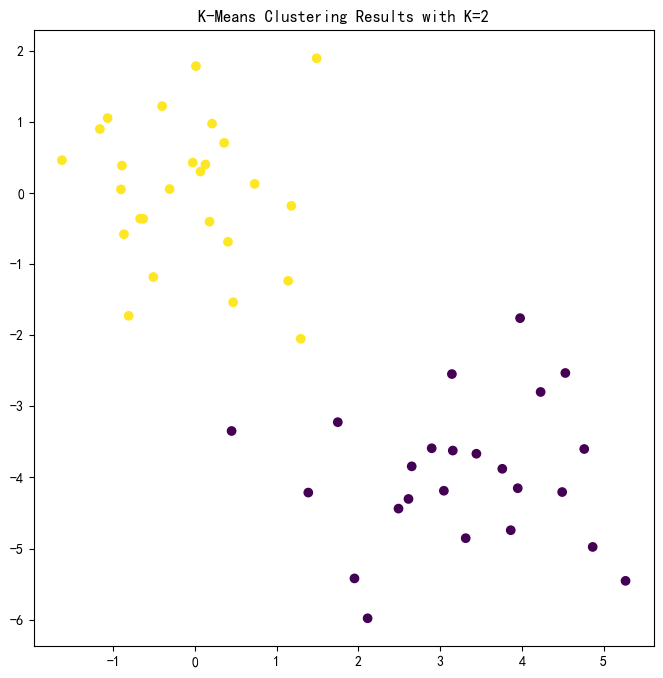

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

**在这里，观测结果可以很容易地绘制出来，因为它们是二维的**。  
**如果有N个变量(N>2)，那么可以执行PCA，并绘制前两个主成分得分向量来表示聚类**。

对于真实数据，我们不知道集群的真实数量，也不知道它们是否以任何精确的方式存在。  
可以在$K=3$的情况下对这个例子进行$K$-means聚类。

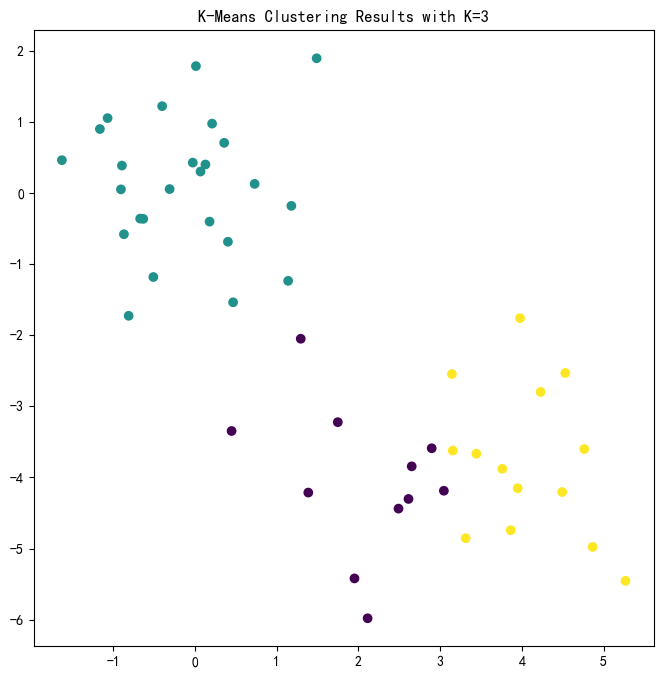

In [39]:
kmeans = KMeans(n_clusters=3, random_state=3, n_init=20).fit(X)
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

**不同参数结果比较**
- 使用n_init参数运行 $K$-means，初始分配20个集群（默认值为10）。
- 如果使用大于1的n_init值，则 $K$-means聚类将使用多个随机分配进行，KMeans（）函数将仅报告最佳结果。
- 这里比较使用n_init=1和n_init=20。

In [40]:
kmeans1 = KMeans(n_clusters=3, random_state=3, n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3, random_state=3, n_init=20).fit(X);
kmeans30 = KMeans(n_clusters=3, random_state=3, n_init=30).fit(X);
kmeans40 = KMeans(n_clusters=3, random_state=3, n_init=40).fit(X);
kmeans1.inertia_, kmeans20.inertia_, kmeans30.inertia_, kmeans40.inertia_

(76.85131986999251, 75.06261242745384, 75.03508259100438, 75.03508259100438)

- kmeans.inertia_是聚类内平方和的总和，通过执行 $K$-means 聚类来最小化它。
- 尽量使用较大的n_init值（如20或30）运行 $K$-means聚类，否则可能会获得不希望的局部最优值。

### **3.2 层次聚类 Hierarchical Clustering**
**sklearn.clustering包中的AgglomerativeClustering()类实现了分层聚类**。  
算法的核心就是：

1. **从每个样本一个簇开始**；

2. 不断寻找**两个最近的簇合并**；

3. 直到**所有样本合并为一个大簇**，形成 **“树状结构（dendrogram）”**。

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
# 这将计算整个树状图
HClust = AgglomerativeClustering
# distance_threshold=0：不提前指定聚类个数，而是构建完整的树状图
hc_comp = HClust(distance_threshold=0, n_clusters=None, linkage='complete') # n_clusters=None 必须和 distance_threshold=0 一起使用  
hc_comp.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [43]:
# 也可以用平均或单个链接轻松地执行分层聚类：
hc_avg = HClust(distance_threshold=0, n_clusters=None, linkage='average');
hc_avg.fit(X)
hc_sing = HClust(distance_threshold=0, n_clusters=None, linkage='single');
hc_sing.fit(X);

#### **两个簇之间的距离”怎么定义？**
| `linkage` 方法       | 两个簇 $A$, $B$ 之间的距离定义为：                                                  |
| ------------------ | ----------------------------------------------------------------------- |
| `'single'`（单链接）    | $\min_{i \in A, j \in B} \text{dist}(x_i, x_j)$：两簇中最**近**两个点的距离；会形成链状结构，对噪声和离群点非常敏感         |
| `'average'`（平均链接）  | $\text{mean}_{i \in A, j \in B} \text{dist}(x_i, x_j)$：簇间**所有成对距离的平均值** ；折中方法，不太受极端值干扰|
| `'complete'`（**完全链接**） | $\max_{i \in A, j \in B} \text{dist}(x_i, x_j)$：两簇中最**远**两个点的距离；聚合时偏向紧密小簇，对噪声敏感度较低         |


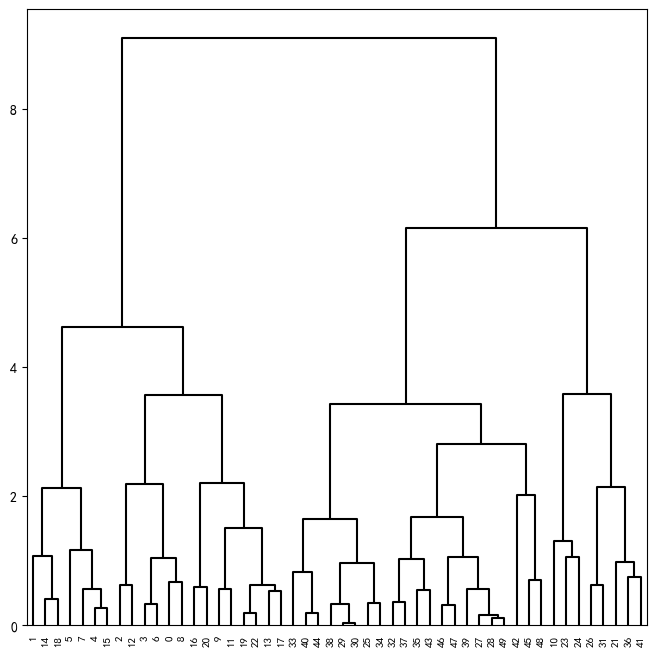

In [44]:
# 强制所有分支都使用 'above_threshold_color' 指定的颜色
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
# ISLP.cluster包中的函数compute_linkage()就是计算聚类链接矩阵的。
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, **cargs);

**样本分布（横轴）**  
- 图底部的数字 0 到 49 表示每个样本的编号（50个样本）  
- 它们最初是独立的（每个样本是一个单独的簇）  

**聚类过程（树枝）**  
- 自下而上：越往上越是聚类的“合并”过程  
- 每一个分支的“合并点”表示两个簇的最小距离  
- 聚类方法是 linkage='complete'：簇间距离由“最远点对距离”决定  

**距离解释（纵轴）**  
- Y轴代表样本或簇之间的距离  
- 高度越高表示合并时两个簇之间距离越远  
- 比如，顶部两个大簇最终合并处的高度大概在 9 附近，说明它们之间相对较远  

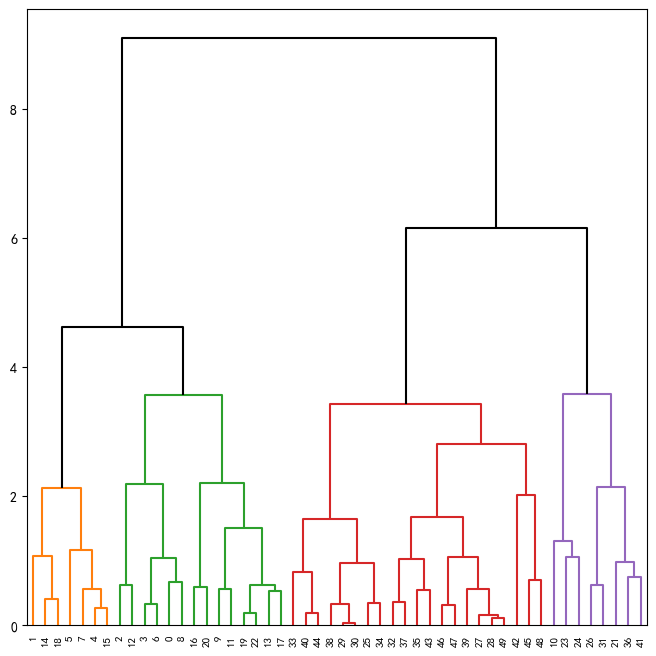

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp, ax=ax, color_threshold=4, above_threshold_color='black');

In [46]:
# 在一定高度处切割”，从而形成指定数量的聚类（这里是 4 个簇）。
cut_tree(linkage_comp, n_clusters=4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]], dtype=int64)

**聚类选择技巧**  
- 可以通过“剪断”这棵树来选定想要的簇数（K）：
- 剪断的位置（即选定一个阈值）越高，簇数越少
- 剪得越低，簇数越多（每次合并形成新簇）
- 例如，在高度约为 5 剪断，可以得到 2~3 个主要簇

**这可以通过向HClust()提供参数n_clusters来实现**；
- 然而，每次切割都需要重新计算聚类。
- 这里不指定簇的数量，而是根据合并高度 height=5 来“剪断”树图
    - 比如，在树图上剪断“高度 = 5”的水平线，所有在该线以下合并的簇将会被分组
    - **有时这比指定 n_clusters 更直观**（从树图结构直接看到在哪个高度分几类）

In [47]:
cut_tree(linkage_comp, height=5)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]], dtype=int64)

In [48]:
# 对观测值进行分层聚类之前缩放变量
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
hc_comp_scale = HClust(distance_threshold=0, n_clusters=None, linkage='complete').fit(X_scale)

#### **未缩放的树图在高度=9时分4个主分支，而标准化后变成了2个主分支**
这是非常典型的现象 —— 变量标准化 极大影响 层次聚类的结构

**标准化前（未缩放）**：  
- 如果某个变量的数值差异更大，可能形成更多“方向”的差异，导致聚类树出现更多主分支  
- 比如原始数据在某个方向拉得更长（如 x 轴），聚类结构呈现多样性 → 形成更多分支  

**标准化后**：  
- 所有变量被压缩为 同一尺度（均值为0，方差为1）  
- 聚类结构只反映出形状差异而非原始大小差异  
- 会聚合更多看似相似的样本 → 主分支更少  

**在层次聚类中，不同特征的尺度会严重影响聚类结构**。

- 比如有两个特征：
    - 一个在 [0, 100] 之间
    - 一个在 [-2, 2] 之间

**那么第一维将主导距离计算，扭曲聚类结构，因此标准化是必要的**。

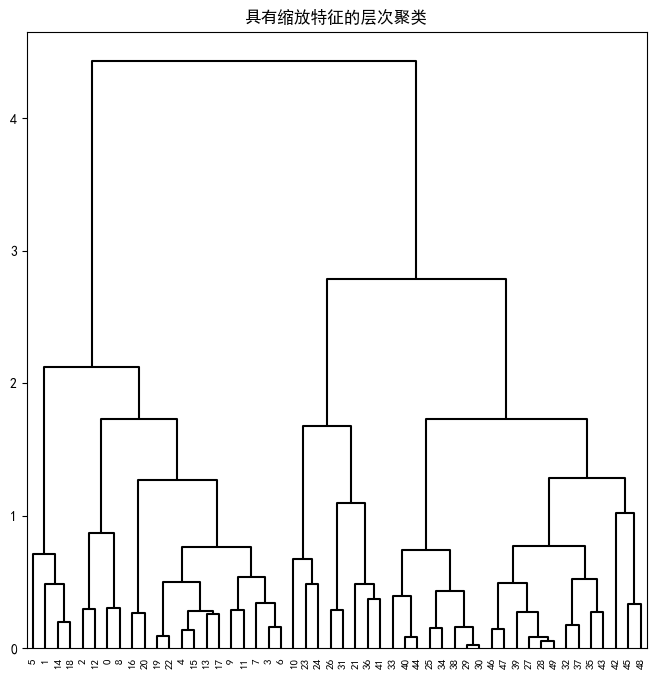

In [49]:
linkage_comp_scale = compute_linkage(hc_comp_scale)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, **cargs)
ax.set_title("具有缩放特征的层次聚类");

### **层次聚类 vs K-Means 的关键区别**
| 特征       | 层次聚类（Hierarchical）                  | K-Means                       |
| -------- | ----------------------------------- | ----------------------------- |
| 是否需要指定 K | ❌ **不需要**提前指定 K                     | ✅ **需要**指定 K                  |
| 聚类结构     | 返回**一棵树（dendrogram）**，可选择任意层次进行剪切 | 返回固定的 K 个簇标签                  |
| 原理       | 迭代合并（或分裂）簇，基于 `linkage` 的距离定义       | 不断移动 K 个中心，最小化平方距离误差（inertia） |
| 类型       | 层次式聚类，适合探索数据结构                      | 分区式聚类，适合快速聚类大量数据              |
| 稳定性      | 比较稳定，对初始值不敏感                        | 对初始中心敏感（需要多次运行）               |
| 算法复杂度    | 较高，适合小数据                   | 较快，适合大数据               |
| 可解释性     | 有 dendrogram，层级关系明确                 | 中心+标签，没有层级结构                  |


## **4. NCI60 Data Example**
- **无监督学习技术常用于分析基因组数据**。
- *PCA和层次聚类*是流行的工具。
- 本节在NCI60癌症细胞系微阵列数据上说明了这些技术，该数据由：  
**64 个癌症细胞系的6830 个基因的表达数据测量组成**。

In [50]:
NCI60 = load_data('NCI60')
nci_labs = NCI60['labels']
nci_data = NCI60['data']
NCI60

{'data': array([[ 0.3     ,  1.18    ,  0.55    , ...,  0.28    , -0.34    ,
         -1.93    ],
        [ 0.679961,  1.289961,  0.169961, ..., -0.770039, -0.390039,
         -2.000039],
        [ 0.94    , -0.04    , -0.17    , ..., -0.12    , -0.41    ,
          0.      ],
        ...,
        [ 0.21    , -0.62    , -0.15    , ...,  0.16    ,  2.03    ,
          3.94    ],
        [-0.05    ,  0.14    , -0.09    , ..., -0.49    ,  0.01    ,
         -1.72    ],
        [ 0.35    , -0.27    ,  0.02    , ...,  0.29    , -0.15    ,
          1.21    ]]),
 'labels':        label
 0        CNS
 1        CNS
 2        CNS
 3      RENAL
 4     BREAST
 ..       ...
 59  MELANOMA
 60  MELANOMA
 61  MELANOMA
 62  MELANOMA
 63  MELANOMA
 
 [64 rows x 1 columns]}

In [51]:
# 数据有64行6830列。
nci_data.shape

(64, 6830)

In [52]:
# 首先检查癌症类型的细胞系
nci_labs.value_counts()

label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
Name: count, dtype: int64

### **4.1 应用PCA**
每个基因（变量）的表达值可能量纲不同、方差不同。因此需要标准化。

将 6830 维数据压缩为更少的维度（例如前2个主成分），同时尽量保留原始信息。

提取出 主成分得分（scores），表示每个样本在各主成分上的坐标位置。

In [53]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(nci_data)
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(nci_scaled)
nci_scores

array([[ 1.98380417e+01, -3.55563601e+00, -9.81239940e+00, ...,
         3.92266143e-01,  8.94903994e-01, -2.34306017e-14],
       [ 2.30892149e+01, -6.44145978e+00, -1.34782512e+01, ...,
        -7.76330257e-01, -9.69009169e-01, -2.34306017e-14],
       [ 2.74561144e+01, -2.46514326e+00, -3.53305434e+00, ...,
         4.98404578e-01,  8.44417986e-01, -2.34306017e-14],
       ...,
       [ 2.29669875e+01,  3.61020384e+01,  1.81165786e+01, ...,
        -3.37372043e-01,  2.68801414e-01, -2.34306017e-14],
       [ 1.91760072e+01,  5.03984409e+01,  4.21115253e+00, ...,
        -1.51507990e+00, -1.01150699e+00, -2.34306017e-14],
       [ 1.32328698e+01,  3.51252492e+01,  3.43355443e+00, ...,
         5.92331292e-01,  6.70834261e-01, -2.34306017e-14]])

**形状为 (64, 64) 的矩阵，表示 64 个样本在前 64 个主成分方向上的投影（因为最多只有 64 个非零特征方向）**  

每一行：表示一个癌症细胞系在 PCA 空间的坐标（投影）

每一列：对应一个主成分（PC1, PC2, ..., PC64）

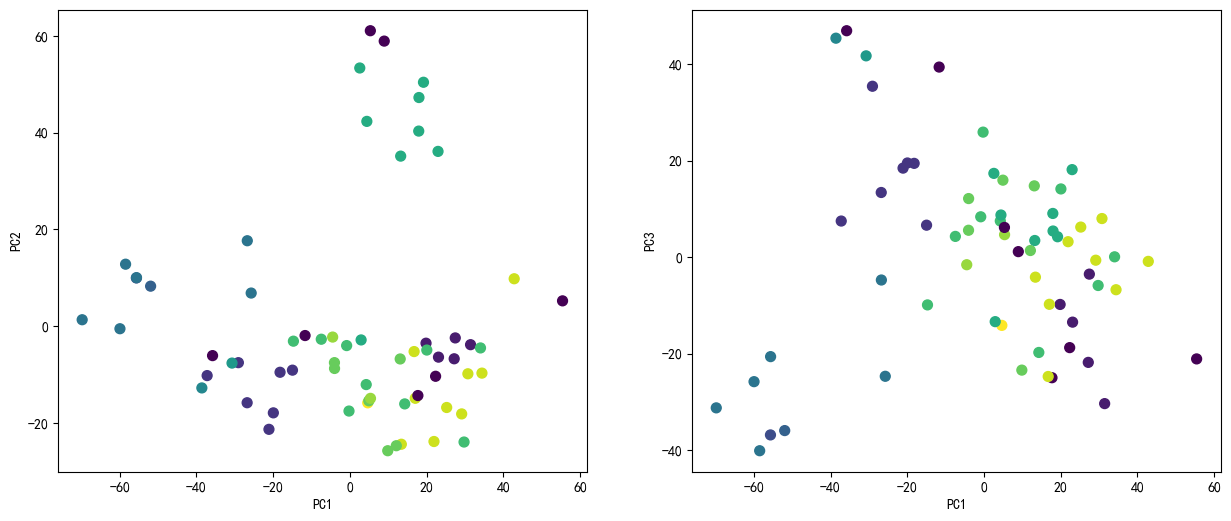

In [54]:
# 获取独特癌症种类
cancer_types = list(np.unique(nci_labs))
# nci_groups 是每个样本对应的整数型类别索引
nci_groups = np.array([cancer_types.index(lab)
                       for lab in nci_labs.values])

fig, axes = plt.subplots(1, 2, figsize=(15,6))
# 最能解释数据差异的两个主方向的投影
ax = axes[0]
ax.scatter(nci_scores[:,0], nci_scores[:,1], c=nci_groups, marker='o', s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
# 替换了 y 轴为 PC3，用于探索主成分3是否能进一步分离样本。
ax = axes[1]
ax.scatter(nci_scores[:,0], nci_scores[:,2], c=nci_groups, marker='o', s=50)
ax.set_xlabel('PC1'); ax.set_ylabel('PC3');

#### **分析**
1. 不同颜色代表不同癌症类型（比如紫色、绿色、黄色等）。

2. 可以看到一些颜色的样本在二维空间中形成了清晰的聚类（例如左上角或右下角的紫色团，或靠近原点的一些绿色团块）。  
**这说明这些细胞系在主成分1 和 主成分2上具有相似的投影方向，暗示基因表达模式接近**。

**对应于单个癌症类型的细胞系在前几个主成分得分向量上往往具有相似的值**。  
- 图中颜色团块的结构验证了PCA能揭示潜在结构。  
- 主成分得分相似 → 原始表达值相似 → 同类型癌症的细胞系表现相近 → 说明无监督学习揭示了真实的生物学分组现象。  

**将PC2换成PC3，有时能更好地区分某些类别（尤其是PC2不能很好区分时）**。  
- 可观察到某些颜色（如黄色、深绿色）在这个投影中分得更散，这说明第三主成分可能提供了额外的区分维度，但整体分布仍较为连续。

---

#### **还可以绘制由主成分解释的百分比方差以及解释的累积百分比方差**。
- 这与之前为USArrests数据绘制的图类似。

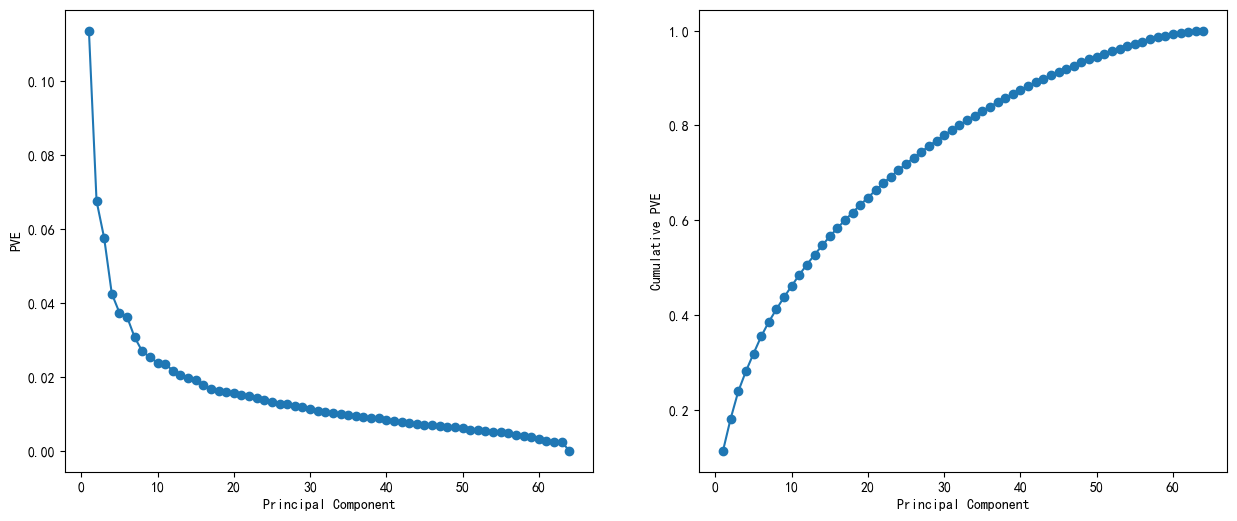

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

ax = axes[0]
ticks = np.arange(nci_pca.n_components_)+1
ax.plot(ticks, nci_pca.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('PVE')

ax = axes[1]
ax.plot(ticks, nci_pca.explained_variance_ratio_.cumsum(), marker='o');
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative PVE');

**可以观察到，前七个主成分共同解释了数据中约40%的方差。**。
- 观察scree图，可以发现，**前七个主成分中的每一个都解释了大量的方差（每个主成分的解释方差（PVE）），由其他主成分解释的方差明显减小**。
- 也就是说，在大约第七个主成分之后的图中有一个弯头。
- 这表明，检查超过七个左右的主成分可能没有什么好处（尽管即使检查七个主成分也可能很困难）。

### **4.2 对NCI60数据的观察结果进行聚类**
- 现在使用完全、单一和平均连锁对NCI60数据中的细胞系进行分层聚类。
- 目标是找出观察结果是否属于不同类型的癌症。
- 欧几里德距离被用作相异度度量。

In [56]:
# 生成三个树状图。
def plot_nci(linkage, ax, cut=-np.inf):
    # 树状图中“高于 cut 的链接”使用黑色线
    cargs = {'above_threshold_color':'black', 'color_threshold':cut}
    # 设置聚类方式，函数中自动转换为小写
    hc = HClust(n_clusters=None, distance_threshold=0, linkage=linkage.lower()).fit(nci_scaled)
    
    linkage_ = compute_linkage(hc)
    # 每个叶子节点显示原始癌症类型标签
    dendrogram(linkage_, ax=ax, labels=np.asarray(nci_labs), leaf_font_size=10, **cargs)
    ax.set_title('%s Linkage' % linkage)
    return hc

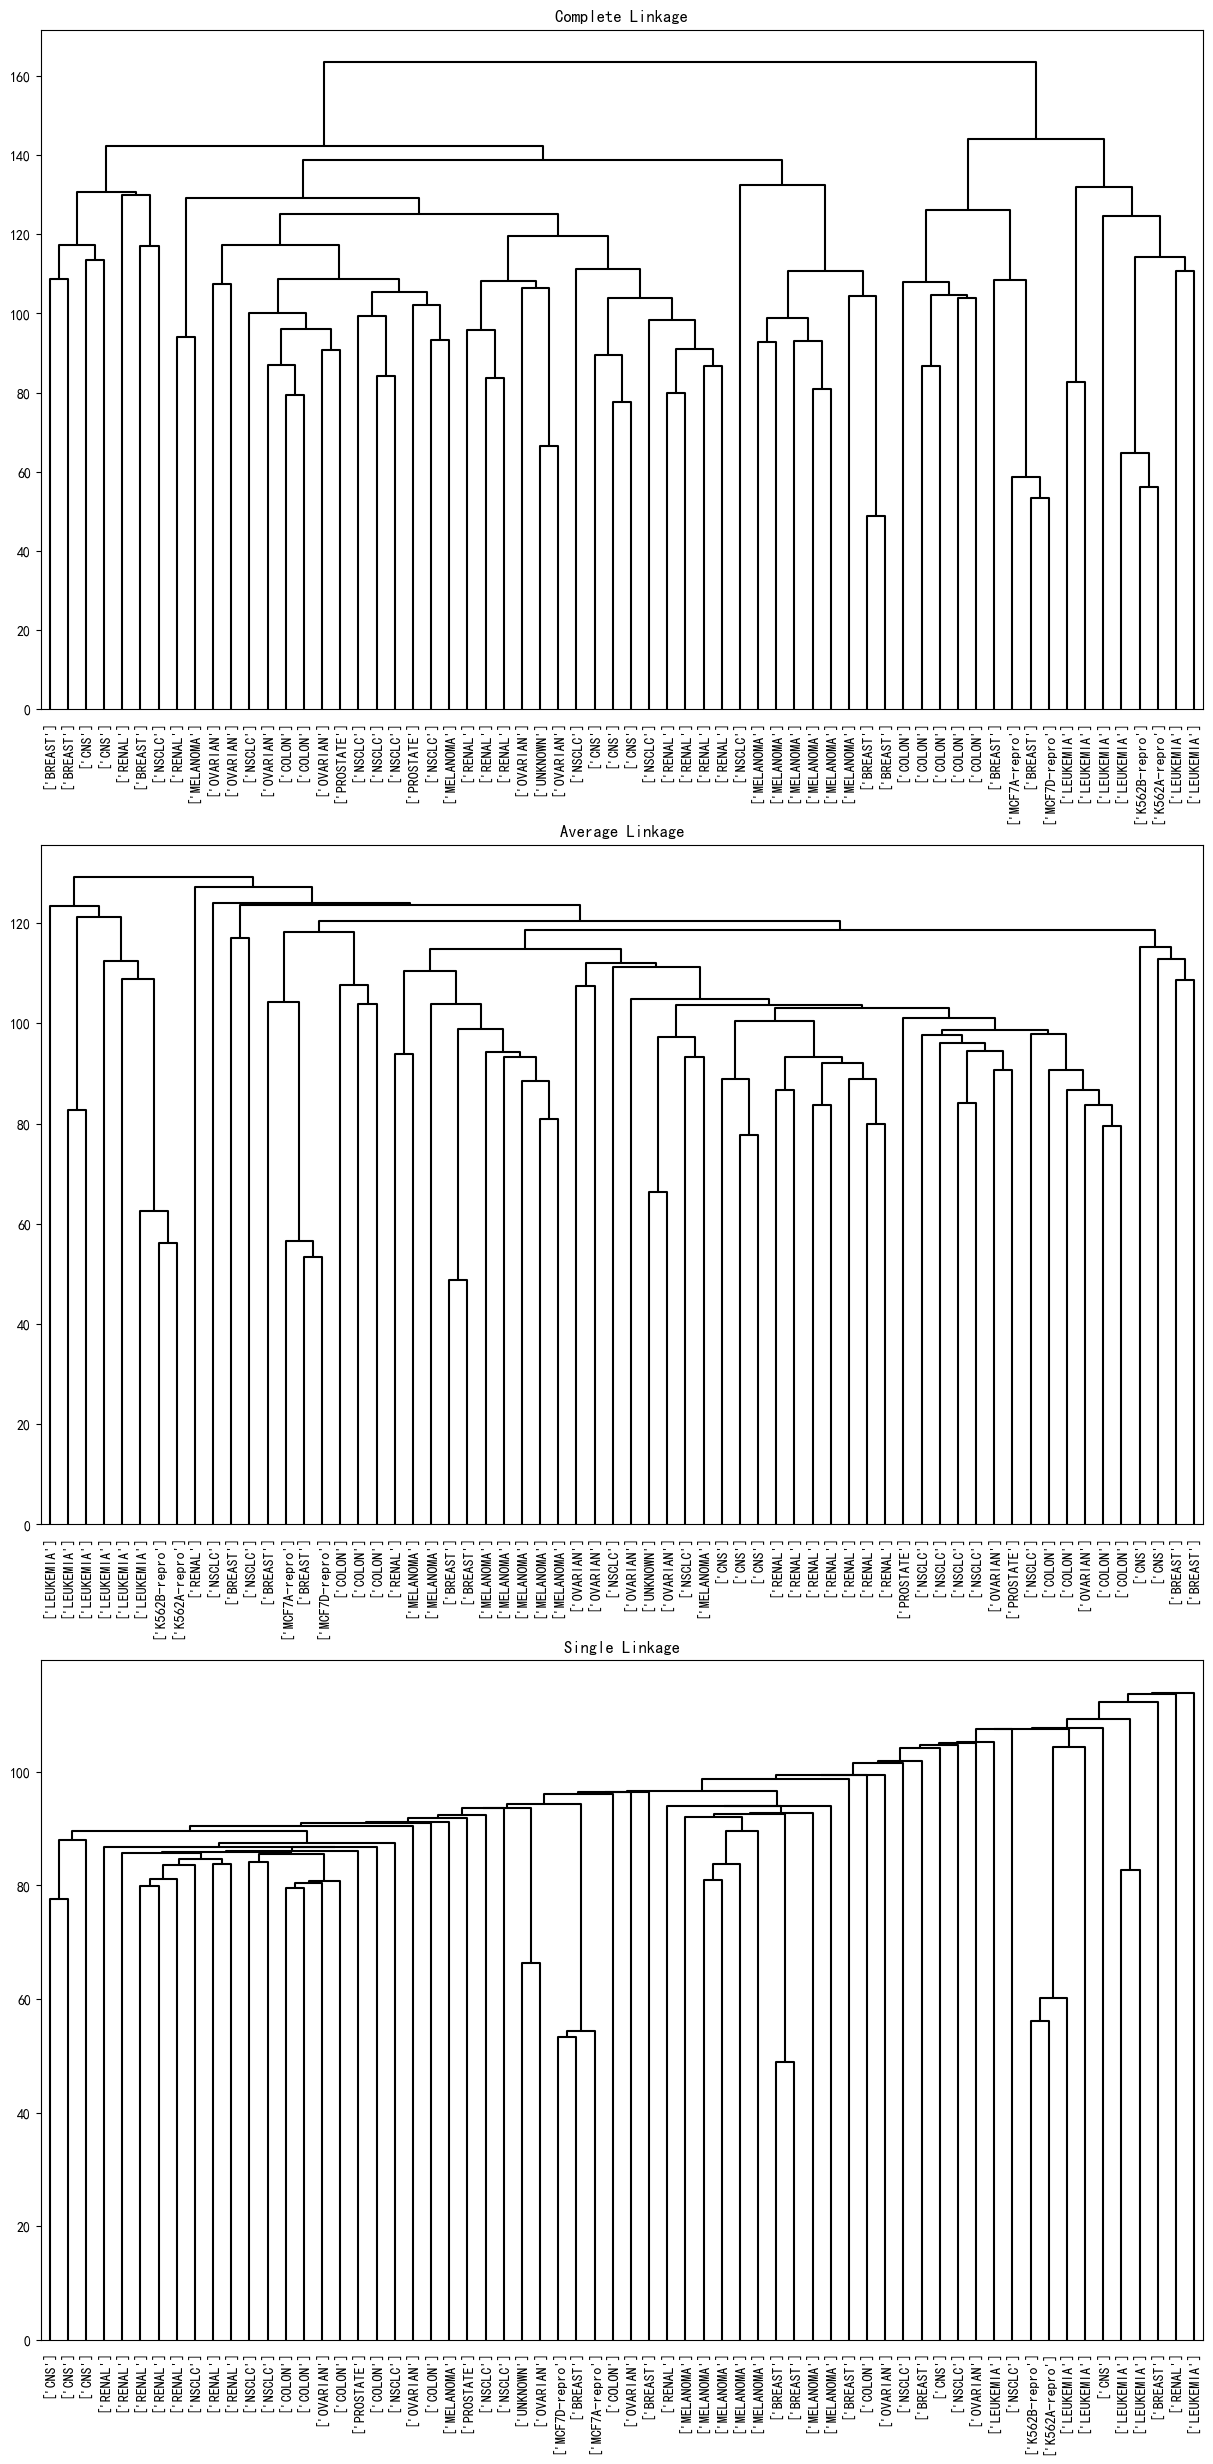

In [57]:
# 绘制结果
fig, axes = plt.subplots(3, 1, figsize=(15,30))      
ax = axes[0]; hc_comp = plot_nci('Complete', ax)
ax = axes[1]; hc_avg = plot_nci('Average', ax)
ax = axes[2]; hc_sing = plot_nci('Single', ax)

**结果看来，linkage的选择确实会影响所获得的结果**。

**1. Complete Linkage 图（图一）**
- 树状图分支结构 比较平衡，每次合并前需要考虑两个簇最远点的距离，使得每个簇内部紧凑。
- 聚类倾向于形成球状紧密的簇。效果最好，因为它让每类内部更紧凑，树状图分支更清晰（更适合做类的划分）。

**2. Average Linkage 图（图二）**
- 平衡性居中，合并时考虑所有点的平均距离。
- 对异常值不如 complete robust，但比 single 好。通常被认为是一个 折中方案，适合中等数量样本和中等噪声。

**3. Single Linkage 图（图三）**
- 可见很多簇像链条一样逐步连接（尤其右侧部分高度变化小） → 这是“链状效应”（chaining effect）。
- 只需要最近两个点近，就可以合并 → 很容易受到噪声和异常点影响。因其链式结构会影响聚类判断力，尤其在基因表达这类高维数据中。

---

In [58]:
# 使用完整的complete linkage层次聚类进行分析。
linkage_comp = compute_linkage(hc_comp)
# 我们可以在树高处切割树状图，得到特定数量的簇，比如四个：
comp_cut = cut_tree(linkage_comp, n_clusters=4).reshape(-1)
# 构建一个交叉表，行是已知的癌症标签，列是聚类编号
pd.crosstab(nci_labs['label'], pd.Series(comp_cut.reshape(-1), name='Complete'))

Complete,0,1,2,3
label,,,,
BREAST,2,3,0,2
CNS,3,2,0,0
COLON,2,0,0,5
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


**LEUKEMIA（白血病）全部被聚为 cluster 2**，表示这一类具有高度相似性，聚类效果很好。

**MELANOMA、OVARIAN、RENAL、NSCLC 等实体瘤癌种大多被归为 cluster 0**，说明这些癌种的表达谱存在一定的共性。

**COLON 分布在 cluster 0 和 3，但 5 个集中在 cluster 3**，也提示 cluster 3 可能代表结直肠癌相关特征。

**BREAST 较为分散**，表明乳腺癌内部存在异质性（不同子型？或技术变异？）

**样本分布参考**：
- 数据集中有约 14 类癌症标签，但某些标签样本极少（如 K562A、MCF7D 只有 1 个样本），所以真实可区分的类可能没那么多。
- 选择 4 个簇是希望避免聚类过细导致结果不稳定。

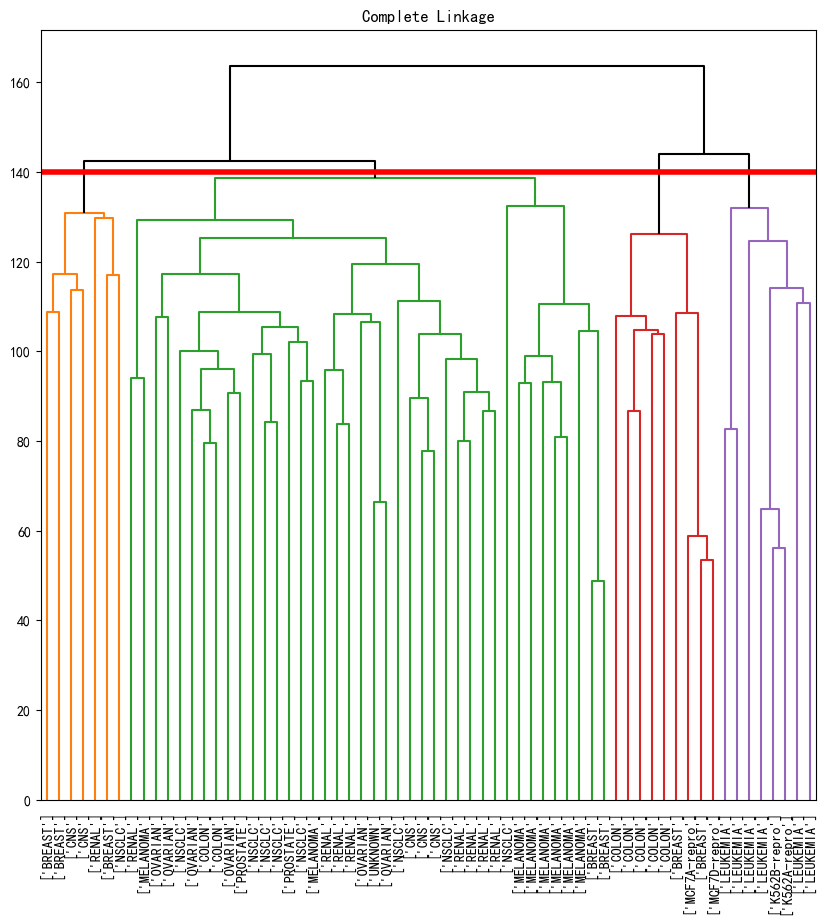

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
# 顶部绘制一条水平线，高亮不同聚类的颜色
plot_nci('Complete', ax, cut=140)
# 表示在该树高水平切断 → 即定义了“4 个聚类”的切割标准。
ax.axhline(140, c='r', linewidth=4);

### **案例结论**

**1**. 选择4 个簇（聚类数量）的核心目的是在**捕捉数据的主要结构特征和保持模型简洁性之间取得平衡**。

**2. 观察树状图的结构**：  
- 树状图中在高度约为 140 的地方，出现了一个“明显跳跃”或较大的垂直距离差异，**意味着数据在该层次上分成了相对稳定的 4 个聚类结构**。
- 这种“跳跃”通常被称为 最大联接距离差，表示形成新的簇时需要额外“牺牲”的距离。

**3. 简洁性与可视化清晰度**：  
- 从分析和解释角度看，4 个簇足以揭示 LEUKEMIA 的分离性、实体瘤的异质性，且可清楚在树状图中呈现不同颜色块。


| 项目   | 结论                                                            |
| ---- | ------------------------------------------------------------- |
| **聚类方法** | 使用 complete linkage，生成结构清晰、类内紧密的聚类结果                          |
| **聚类数量** | 指定为 4，能够捕捉癌症细胞类型的主要变异方向                                       |
| **效果表现** | 白血病细胞被完美聚类；其他癌种中 MELANOMA、RENAL 等也表现不错；乳腺癌具有较大异质性             |
| **结论意义** | 聚类结果在无监督条件下成功揭示了某些癌症类型的生物学一致性|

**该数据具有潜在的结构性，可用于后续分类建模或特征选择等任务** 